<a href="https://colab.research.google.com/github/sainath6304796986/Machine-Learning-Assignments/blob/sai/21232_Assignment_IV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [121]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [122]:
import pandas as pd
import numpy as np







In [123]:
df=pd.read_csv('/content/drive/MyDrive/datasets for ml/Reviews.csv')

In [124]:
df.head()

,Name,Ratings,Header,Date,Product_Details,Review,Helpful
0,S Mukherjee,4,"An average product,compared to price and quant...",12 October 2022,Colour: Blue,Good product in its price,One person found this helpful
1,Asish,4,Nice,10 October 2022,Colour: Black-Grey,Good product for gift,One person found this helpful
2,Sridevi kathir,4,Good,9 October 2022,Colour: Black-Grey,Good as we expected weight less..,One person found this helpful
3,Sai c.,4,Good,11 October 2022,Colour: Black-Grey,Super,One person found this helpful
4,Adarsh Kumar,4,Amezing,4 October 2022,Colour: Grey,Best of best. 👍,One person found this helpful


In [125]:
df1=df.drop(['Name','Header','Date','Product_Details','Helpful'],axis=1)    #Dropping down all other unnecessary extra Features
df1

,Ratings,Review
0,4,Good product in its price
1,4,Good product for gift
2,4,Good as we expected weight less..
3,4,Super
4,4,Best of best. 👍
...,...,...
4995,5,Good
4996,5,Very good
4997,5,Very good
4998,5,Very good product


Cleaning Data

In [126]:
df1=df1.drop_duplicates()
df1

,Ratings,Review
0,4,Good product in its price
1,4,Good product for gift
2,4,Good as we expected weight less..
3,4,Super
4,4,Best of best. 👍
...,...,...
4988,2,The product is not so good . Can be tear in 2 ...
4989,2,Quality is not so good
4990,1,"After 2 months use , the bag got teared and th..."
4991,5,Spacious


In [127]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, LancasterStemmer
from imblearn.under_sampling import RandomUnderSampler
import string
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [128]:
import string
string.punctuation



'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [129]:
df1.dropna(inplace = True, axis = 0)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [130]:
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree
#storing the puntuation free text
df1['clean_msg']= df1['Review'].apply(lambda x:remove_punctuation(x))
df1.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Ratings,Review,clean_msg
0,4,Good product in its price,Good product in its price
1,4,Good product for gift,Good product for gift
2,4,Good as we expected weight less..,Good as we expected weight less
3,4,Super,Super
4,4,Best of best. 👍,Best of best 👍


In [131]:
df1['msg_lower']= df1['clean_msg'].apply(lambda x: x.lower())
df1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Ratings,Review,clean_msg,msg_lower
0,4,Good product in its price,Good product in its price,good product in its price
1,4,Good product for gift,Good product for gift,good product for gift
2,4,Good as we expected weight less..,Good as we expected weight less,good as we expected weight less
3,4,Super,Super,super
4,4,Best of best. 👍,Best of best 👍,best of best 👍
...,...,...,...,...
4988,2,The product is not so good . Can be tear in 2 ...,The product is not so good Can be tear in 2 3...,the product is not so good can be tear in 2 3...
4989,2,Quality is not so good,Quality is not so good,quality is not so good
4990,1,"After 2 months use , the bag got teared and th...",After 2 months use the bag got teared and the...,after 2 months use the bag got teared and the...
4991,5,Spacious,Spacious,spacious


In [132]:
import re
def tokenization(text):
    tokens = re.split('W+',text)
    return tokens
#applying function to the column
df1['msg_tokenied']= df1['msg_lower'].apply(lambda x: tokenization(x))
df1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Ratings,Review,clean_msg,msg_lower,msg_tokenied
0,4,Good product in its price,Good product in its price,good product in its price,[good product in its price]
1,4,Good product for gift,Good product for gift,good product for gift,[good product for gift]
2,4,Good as we expected weight less..,Good as we expected weight less,good as we expected weight less,[good as we expected weight less]
3,4,Super,Super,super,[super]
4,4,Best of best. 👍,Best of best 👍,best of best 👍,[best of best 👍]
...,...,...,...,...,...
4988,2,The product is not so good . Can be tear in 2 ...,The product is not so good Can be tear in 2 3...,the product is not so good can be tear in 2 3...,[the product is not so good can be tear in 2 ...
4989,2,Quality is not so good,Quality is not so good,quality is not so good,[quality is not so good]
4990,1,"After 2 months use , the bag got teared and th...",After 2 months use the bag got teared and the...,after 2 months use the bag got teared and the...,[after 2 months use the bag got teared and th...
4991,5,Spacious,Spacious,spacious,[spacious]


In [133]:
import nltk
#Stop words present in the library
stopwords = nltk.corpus.stopwords.words('english')
stopwords[0:10]
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're",]


def remove_stopwords(text):
    output= [i for i in text if i not in stopwords]
    return output




In [134]:
df1['no_stopwords']= df1['msg_tokenied'].apply(lambda x:remove_stopwords(x))
df1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Ratings,Review,clean_msg,msg_lower,msg_tokenied,no_stopwords
0,4,Good product in its price,Good product in its price,good product in its price,[good product in its price],[good product in its price]
1,4,Good product for gift,Good product for gift,good product for gift,[good product for gift],[good product for gift]
2,4,Good as we expected weight less..,Good as we expected weight less,good as we expected weight less,[good as we expected weight less],[good as we expected weight less]
3,4,Super,Super,super,[super],[super]
4,4,Best of best. 👍,Best of best 👍,best of best 👍,[best of best 👍],[best of best 👍]
...,...,...,...,...,...,...
4988,2,The product is not so good . Can be tear in 2 ...,The product is not so good Can be tear in 2 3...,the product is not so good can be tear in 2 3...,[the product is not so good can be tear in 2 ...,[the product is not so good can be tear in 2 ...
4989,2,Quality is not so good,Quality is not so good,quality is not so good,[quality is not so good],[quality is not so good]
4990,1,"After 2 months use , the bag got teared and th...",After 2 months use the bag got teared and the...,after 2 months use the bag got teared and the...,[after 2 months use the bag got teared and th...,[after 2 months use the bag got teared and th...
4991,5,Spacious,Spacious,spacious,[spacious],[spacious]


In [135]:
from nltk.stem.porter import PorterStemmer
#defining the object for stemming
porter_stemmer = PorterStemmer()

In [136]:
def stemming(text):
  stem_text = [porter_stemmer.stem(word) for word in text]
  return stem_text
df1['msg_stemmed']=df1['no_stopwords'].apply(lambda x: stemming(x))
df1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Ratings,Review,clean_msg,msg_lower,msg_tokenied,no_stopwords,msg_stemmed
0,4,Good product in its price,Good product in its price,good product in its price,[good product in its price],[good product in its price],[good product in its pric]
1,4,Good product for gift,Good product for gift,good product for gift,[good product for gift],[good product for gift],[good product for gift]
2,4,Good as we expected weight less..,Good as we expected weight less,good as we expected weight less,[good as we expected weight less],[good as we expected weight less],[good as we expected weight less]
3,4,Super,Super,super,[super],[super],[super]
4,4,Best of best. 👍,Best of best 👍,best of best 👍,[best of best 👍],[best of best 👍],[best of best 👍]
...,...,...,...,...,...,...,...
4988,2,The product is not so good . Can be tear in 2 ...,The product is not so good Can be tear in 2 3...,the product is not so good can be tear in 2 3...,[the product is not so good can be tear in 2 ...,[the product is not so good can be tear in 2 ...,[the product is not so good can be tear in 2 ...
4989,2,Quality is not so good,Quality is not so good,quality is not so good,[quality is not so good],[quality is not so good],[quality is not so good]
4990,1,"After 2 months use , the bag got teared and th...",After 2 months use the bag got teared and the...,after 2 months use the bag got teared and the...,[after 2 months use the bag got teared and th...,[after 2 months use the bag got teared and th...,[after 2 months use the bag got teared and th...
4991,5,Spacious,Spacious,spacious,[spacious],[spacious],[spaciou]


In [137]:
from nltk.stem import WordNetLemmatizer
#defining the object for Lemmatization
wordnet_lemmatizer = WordNetLemmatizer()

In [138]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [139]:
def lemmatizer(text):
  lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in text]
  return lemm_text
df1['msg_lemmatized']=df1['no_stopwords'].apply(lambda x:lemmatizer(x))
df1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Ratings,Review,clean_msg,msg_lower,msg_tokenied,no_stopwords,msg_stemmed,msg_lemmatized
0,4,Good product in its price,Good product in its price,good product in its price,[good product in its price],[good product in its price],[good product in its pric],[good product in its price]
1,4,Good product for gift,Good product for gift,good product for gift,[good product for gift],[good product for gift],[good product for gift],[good product for gift]
2,4,Good as we expected weight less..,Good as we expected weight less,good as we expected weight less,[good as we expected weight less],[good as we expected weight less],[good as we expected weight less],[good as we expected weight less]
3,4,Super,Super,super,[super],[super],[super],[super]
4,4,Best of best. 👍,Best of best 👍,best of best 👍,[best of best 👍],[best of best 👍],[best of best 👍],[best of best 👍]
...,...,...,...,...,...,...,...,...
4988,2,The product is not so good . Can be tear in 2 ...,The product is not so good Can be tear in 2 3...,the product is not so good can be tear in 2 3...,[the product is not so good can be tear in 2 ...,[the product is not so good can be tear in 2 ...,[the product is not so good can be tear in 2 ...,[the product is not so good can be tear in 2 ...
4989,2,Quality is not so good,Quality is not so good,quality is not so good,[quality is not so good],[quality is not so good],[quality is not so good],[quality is not so good]
4990,1,"After 2 months use , the bag got teared and th...",After 2 months use the bag got teared and the...,after 2 months use the bag got teared and the...,[after 2 months use the bag got teared and th...,[after 2 months use the bag got teared and th...,[after 2 months use the bag got teared and th...,[after 2 months use the bag got teared and th...
4991,5,Spacious,Spacious,spacious,[spacious],[spacious],[spaciou],[spacious]


In [140]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Ratings         3854 non-null   int64 
 1   Review          3854 non-null   object
 2   clean_msg       3854 non-null   object
 3   msg_lower       3854 non-null   object
 4   msg_tokenied    3854 non-null   object
 5   no_stopwords    3854 non-null   object
 6   msg_stemmed     3854 non-null   object
 7   msg_lemmatized  3854 non-null   object
dtypes: int64(1), object(7)
memory usage: 271.0+ KB


In [141]:
df1['Analysis']=df1['Ratings'].apply(lambda x: 1 if x>3 else 0)
df1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Ratings,Review,clean_msg,msg_lower,msg_tokenied,no_stopwords,msg_stemmed,msg_lemmatized,Analysis
0,4,Good product in its price,Good product in its price,good product in its price,[good product in its price],[good product in its price],[good product in its pric],[good product in its price],1
1,4,Good product for gift,Good product for gift,good product for gift,[good product for gift],[good product for gift],[good product for gift],[good product for gift],1
2,4,Good as we expected weight less..,Good as we expected weight less,good as we expected weight less,[good as we expected weight less],[good as we expected weight less],[good as we expected weight less],[good as we expected weight less],1
3,4,Super,Super,super,[super],[super],[super],[super],1
4,4,Best of best. 👍,Best of best 👍,best of best 👍,[best of best 👍],[best of best 👍],[best of best 👍],[best of best 👍],1
...,...,...,...,...,...,...,...,...,...
4988,2,The product is not so good . Can be tear in 2 ...,The product is not so good Can be tear in 2 3...,the product is not so good can be tear in 2 3...,[the product is not so good can be tear in 2 ...,[the product is not so good can be tear in 2 ...,[the product is not so good can be tear in 2 ...,[the product is not so good can be tear in 2 ...,0
4989,2,Quality is not so good,Quality is not so good,quality is not so good,[quality is not so good],[quality is not so good],[quality is not so good],[quality is not so good],0
4990,1,"After 2 months use , the bag got teared and th...",After 2 months use the bag got teared and the...,after 2 months use the bag got teared and the...,[after 2 months use the bag got teared and th...,[after 2 months use the bag got teared and th...,[after 2 months use the bag got teared and th...,[after 2 months use the bag got teared and th...,0
4991,5,Spacious,Spacious,spacious,[spacious],[spacious],[spaciou],[spacious],1


In [142]:
df1=df1.drop(['msg_stemmed'],axis=1)


In [143]:
df1


,Ratings,Review,clean_msg,msg_lower,msg_tokenied,no_stopwords,msg_lemmatized,Analysis
0,4,Good product in its price,Good product in its price,good product in its price,[good product in its price],[good product in its price],[good product in its price],1
1,4,Good product for gift,Good product for gift,good product for gift,[good product for gift],[good product for gift],[good product for gift],1
2,4,Good as we expected weight less..,Good as we expected weight less,good as we expected weight less,[good as we expected weight less],[good as we expected weight less],[good as we expected weight less],1
3,4,Super,Super,super,[super],[super],[super],1
4,4,Best of best. 👍,Best of best 👍,best of best 👍,[best of best 👍],[best of best 👍],[best of best 👍],1
...,...,...,...,...,...,...,...,...
4988,2,The product is not so good . Can be tear in 2 ...,The product is not so good Can be tear in 2 3...,the product is not so good can be tear in 2 3...,[the product is not so good can be tear in 2 ...,[the product is not so good can be tear in 2 ...,[the product is not so good can be tear in 2 ...,0
4989,2,Quality is not so good,Quality is not so good,quality is not so good,[quality is not so good],[quality is not so good],[quality is not so good],0
4990,1,"After 2 months use , the bag got teared and th...",After 2 months use the bag got teared and the...,after 2 months use the bag got teared and the...,[after 2 months use the bag got teared and th...,[after 2 months use the bag got teared and th...,[after 2 months use the bag got teared and th...,0
4991,5,Spacious,Spacious,spacious,[spacious],[spacious],[spacious],1


Modelling


In [144]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [175]:
vec = CountVectorizer()
X = vec.fit_transform(df1["Review"])





y=df1['Analysis']

In [165]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size=0.3, stratify = y)
Xtrain

<2697x3271 sparse matrix of type '<class 'numpy.int64'>'
	with 26931 stored elements in Compressed Sparse Row format>

In [166]:
print(ytrain.value_counts())
print(ytest.value_counts())


1    1814
0     883
Name: Analysis, dtype: int64
1    778
0    379
Name: Analysis, dtype: int64


In [167]:
def print_acc(Ptrain,Ptest,ytrain,ytest):
    print('------------------------------------------------------------------------------|')
    print(f'|  Training Accuracy \n| {classification_report(ytrain, Ptrain)} |')
    #print('------------------------------------------------------------------------------|')
    #print(f'|  Test Accuracy     \n| {classification_report(ytest, Ptest)} |')
    print('------------------------------------------------------------------------------|')

def gen_conf(actual,pred):
    classes = [0,1]
    cm = confusion_matrix(actual,pred, labels=classes)
    sn.heatmap(cm, annot=True)
    plt.title("Confusion matrix")
    plt.show()

------------------------------------------------------------------------------|
|  Training Accuracy 
|               precision    recall  f1-score   support

           0       0.88      0.89      0.88       883
           1       0.95      0.94      0.94      1814

    accuracy                           0.92      2697
   macro avg       0.91      0.92      0.91      2697
weighted avg       0.92      0.92      0.92      2697
 |
------------------------------------------------------------------------------|


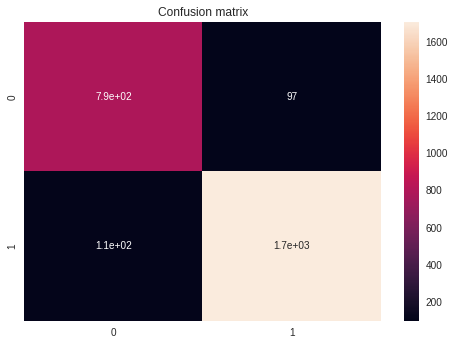

In [168]:
clf = svm.SVC(class_weight = 'balanced')
clf.fit(Xtrain, ytrain)
trpred = clf.predict(Xtrain)
tpred = clf.predict(Xtest)
print_acc(trpred, tpred, ytrain, ytest)
gen_conf(ytrain, trpred)

------------------------------------------------------------------------------|
|  Training Accuracy 
|               precision    recall  f1-score   support

           0       0.89      0.74      0.81       883
           1       0.88      0.96      0.92      1814

    accuracy                           0.89      2697
   macro avg       0.89      0.85      0.87      2697
weighted avg       0.89      0.89      0.88      2697
 |
------------------------------------------------------------------------------|


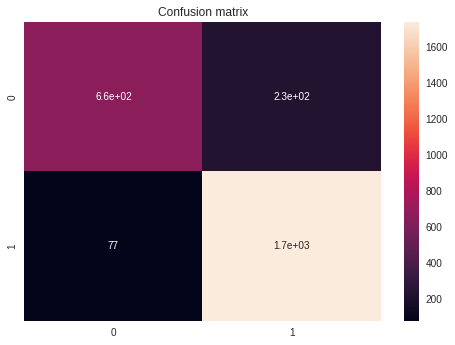

In [170]:
mnb = MultinomialNB()
mnb.fit(Xtrain, ytrain)
trpred = mnb.predict(Xtrain)
tpred = mnb.predict(Xtest)
print_acc(trpred, tpred, ytrain, ytest)
gen_conf(ytrain, trpred)

------------------------------------------------------------------------------|
|  Training Accuracy 
|               precision    recall  f1-score   support

           0       0.98      0.98      0.98       883
           1       0.99      0.99      0.99      1814

    accuracy                           0.99      2697
   macro avg       0.99      0.99      0.99      2697
weighted avg       0.99      0.99      0.99      2697
 |
------------------------------------------------------------------------------|


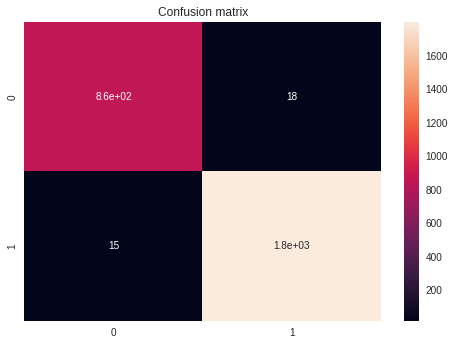

In [171]:
dtc = DecisionTreeClassifier()
dtc.fit(Xtrain, ytrain)
trpred = dtc.predict(Xtrain)
tpred = dtc.predict(Xtest)
print_acc(trpred, tpred, ytrain, ytest)
gen_conf(ytrain, trpred)

------------------------------------------------------------------------------|
|  Training Accuracy 
|               precision    recall  f1-score   support

           0       0.85      0.62      0.72       883
           1       0.84      0.95      0.89      1814

    accuracy                           0.84      2697
   macro avg       0.84      0.78      0.80      2697
weighted avg       0.84      0.84      0.83      2697
 |
------------------------------------------------------------------------------|


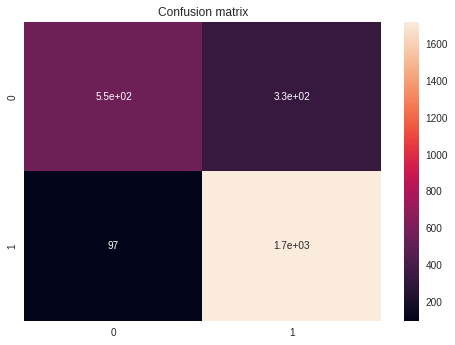

In [172]:
knn = KNeighborsClassifier()
knn.fit(Xtrain, ytrain)
trpred = knn.predict(Xtrain)
tpred = knn.predict(Xtest)
print_acc(trpred, tpred, ytrain, ytest)
gen_conf(ytrain, trpred)

------------------------------------------------------------------------------|
|  Training Accuracy 
|               precision    recall  f1-score   support

           0       0.98      0.18      0.31       883
           1       0.71      1.00      0.83      1814

    accuracy                           0.73      2697
   macro avg       0.85      0.59      0.57      2697
weighted avg       0.80      0.73      0.66      2697
 |
------------------------------------------------------------------------------|


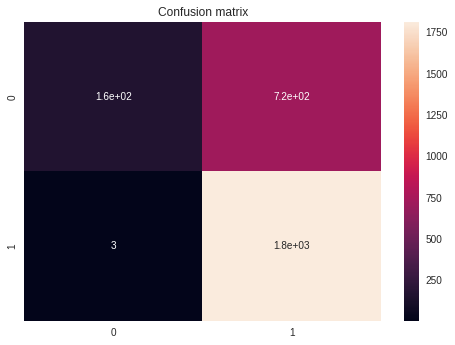

In [173]:
rfc = RandomForestClassifier(n_jobs = -1, max_depth = 10, n_estimators = 50)
rfc.fit(Xtrain, ytrain)
trpred = rfc.predict(Xtrain)
tpred = rfc.predict(Xtest)
print_acc(trpred, tpred, ytrain, ytest)
gen_conf(ytrain, trpred)